In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

649

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | letterkenny
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | ryotsu
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | islamkot
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | manoel urbano
Processing Record 19 of Set 1 | bowen
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | taltal
Processing Record 22 of Set 1 | flin flon
Processing Record 23 of Set 1 | ma

Processing Record 37 of Set 4 | constitucion
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | balkanabat
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | chicama
Processing Record 45 of Set 4 | strezhevoy
Processing Record 46 of Set 4 | kananga
Processing Record 47 of Set 4 | navirai
Processing Record 48 of Set 4 | roma
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | matveyevka
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 3 of Set 5 | juybar
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | tharad
Processing Record 6 of Set 5 | panzhihua
Processing Record 7 of Set 5 | kegayli
City not found. Skipping...
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | sinna

City not found. Skipping...
Processing Record 29 of Set 8 | boyolangu
Processing Record 30 of Set 8 | vuktyl
Processing Record 31 of Set 8 | vao
Processing Record 32 of Set 8 | cherskiy
Processing Record 33 of Set 8 | durango
Processing Record 34 of Set 8 | aksu
Processing Record 35 of Set 8 | ankpa
Processing Record 36 of Set 8 | pitsunda
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | shishou
Processing Record 39 of Set 8 | sistranda
Processing Record 40 of Set 8 | deputatskiy
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | mulege
Processing Record 43 of Set 8 | zaraza
Processing Record 44 of Set 8 | agvali
Processing Record 45 of Set 8 | olafsvik
Processing Record 46 of Set 8 | dingle
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | yamada
Processing Record 49 of Set 8 | beibei
Processing Record 50 of Set 8 | sidi ali
Processing Record 1 of Set 9 | vredendal
Processing Record 2 of Set 9 | umzimvubu
City not foun

Processing Record 14 of Set 12 | binga
Processing Record 15 of Set 12 | mahon
Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | kargasok
Processing Record 18 of Set 12 | senta
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | chulym
Processing Record 21 of Set 12 | rabo de peixe
Processing Record 22 of Set 12 | mandalgovi
Processing Record 23 of Set 12 | zalantun
Processing Record 24 of Set 12 | toliary
City not found. Skipping...
Processing Record 25 of Set 12 | axim
Processing Record 26 of Set 12 | himora
City not found. Skipping...
Processing Record 27 of Set 12 | channel-port aux basques
Processing Record 28 of Set 12 | eseka
Processing Record 29 of Set 12 | sangmelima
Processing Record 30 of Set 12 | derzhavinsk
Processing Record 31 of Set 12 | mokolo
Processing Record 32 of Set 12 | ardakan
Processing Record 33 of Set 12 | oistins
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12

In [9]:
type(city_data)

NameError: name 'city_data' is not defined

In [10]:
len(city_data)

NameError: name 'city_data' is not defined

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
# df = pd.DataFrame(list with dictionaries)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [15]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        595 non-null    object 
 1   Lat         595 non-null    float64
 2   Lng         595 non-null    float64
 3   Max Temp    595 non-null    float64
 4   Humidity    595 non-null    int64  
 5   Cloudiness  595 non-null    int64  
 6   Wind Speed  595 non-null    float64
 7   Country     595 non-null    object 
 8   Date        595 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.0+ KB


In [3]:
city_data_df = city_data_df[[
    "City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df

NameError: name 'city_data_df' is not defined

In [2]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

-------------------------------------------------------------------------------------------
# import city_data_df instead of running API request
-------------------------------------------------------------------------------------------

In [26]:
# read cities.csv into city_data_df (instead of pulling 500+ fresh weather data)
city_data_df = pd.read_csv("weather_data/cities.csv")

In [27]:
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kapaa,US,2022-07-05 14:14:34,22.0752,-159.3190,75.52,78,75,17.27
1,1,Rikitea,PF,2022-07-05 14:14:34,-23.1203,-134.9692,74.57,79,33,11.52
2,2,Lavrentiya,RU,2022-07-05 14:14:34,65.5833,-171.0000,45.03,95,97,6.24
3,3,Punta Arenas,CL,2022-07-05 14:10:54,-53.1500,-70.9167,26.71,93,40,5.75
4,4,Provideniya,RU,2022-07-05 14:14:35,64.3833,-173.3000,46.09,97,100,5.30


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
city_data_df["Lat"]

0      22.0752
1     -23.1203
2      65.5833
3     -53.1500
4      64.3833
        ...   
590   -20.3267
591    10.5669
592    30.3333
593    16.8901
594    -3.3667
Name: Lat, Length: 595, dtype: float64

In [30]:
type(lats)

pandas.core.series.Series

In [31]:
print(lats)

0      22.0752
1     -23.1203
2      65.5833
3     -53.1500
4      64.3833
        ...   
590   -20.3267
591    10.5669
592    30.3333
593    16.8901
594    -3.3667
Name: Lat, Length: 595, dtype: float64


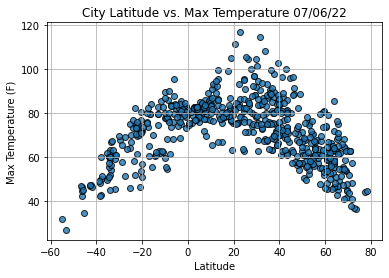

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1_City_Lat_v_Max_Temp.png")

# Show plot.
plt.show()

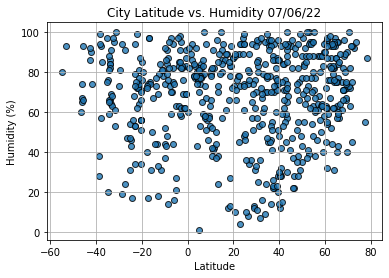

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2_City_Lat_v_Humi.png")
# Show plot.
plt.show()

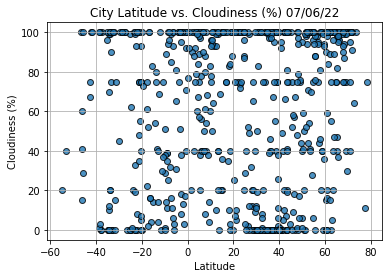

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3_City_Lat_v_Cloudiness.png")
# Show plot.
plt.show()

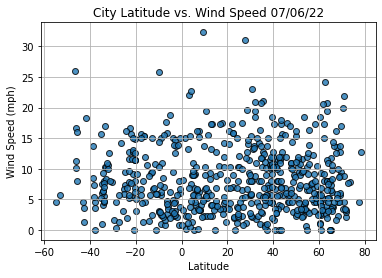

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4_City_Lat_v_WindSpeed.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2) + "R:"+)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}  R={r_value:.2f} P={p_value:.3f}"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
city_data_df.loc[13]

City_ID                        13
City                      Talnakh
Country                        RU
Date          2022-07-05 14:14:38
Lat                       69.4865
Lng                       88.3972
Max Temp                    63.21
Humidity                       40
Cloudiness                     30
Wind Speed                   9.53
Name: 13, dtype: object

In [49]:
city_data_df["Lat"]

0      22.0752
1     -23.1203
2      65.5833
3     -53.1500
4      64.3833
        ...   
590   -20.3267
591    10.5669
592    30.3333
593    16.8901
594    -3.3667
Name: Lat, Length: 595, dtype: float64

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

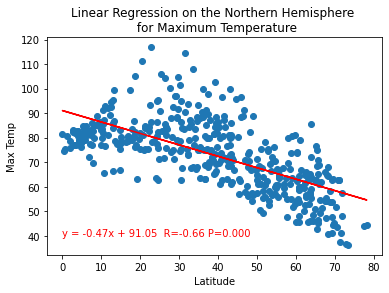

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       'Max Temp',(0,40))

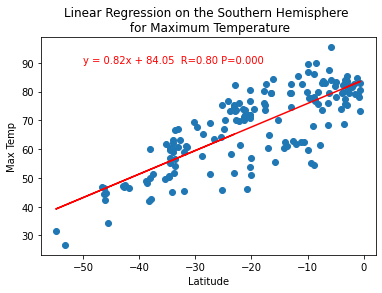

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

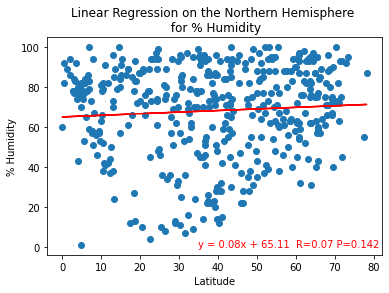

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(35,0))

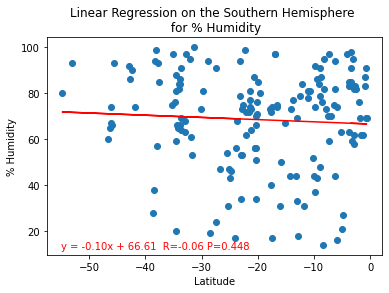

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-55,12))

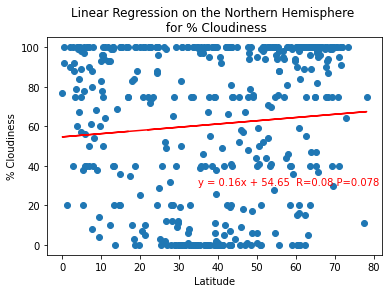

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(35,30))

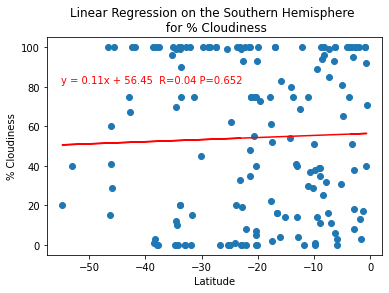

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-55,82))

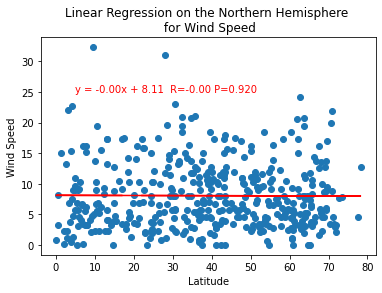

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(5,25))

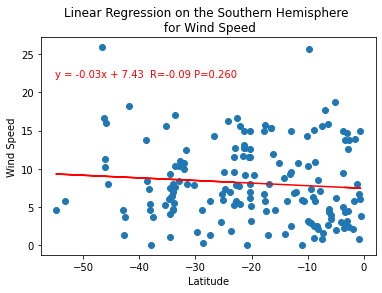

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-55,22))